<a href="https://colab.research.google.com/github/Julian6262/the_founder/blob/main/home%20work%207/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Библиотеки Python для Data Science](https://colab.research.google.com/drive/1VKRkuVNaSRPy6uNRhWLIlfaTnLPuyWcC)
2. [Практика](https://colab.research.google.com/drive/1jL4XbkAMuMNVPXhfsE8Z2Z4h-sGtyAq1)
3. Домашняя работа

Используя базу данных фильмов из практической части урока, проверте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

## Гипотеза 1. Большинство фильмов выпускаются по пятницам

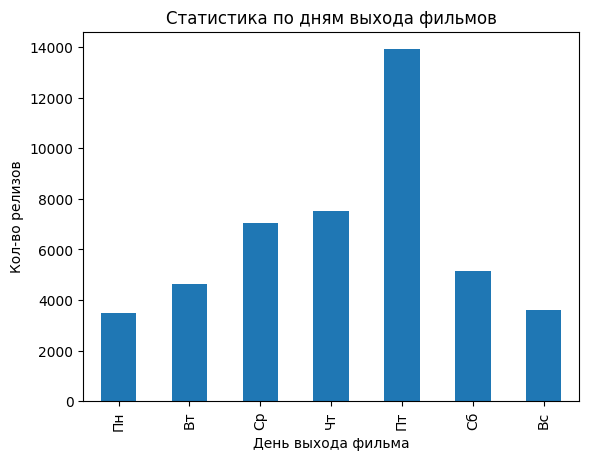

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('./movies_metadata.csv')
credits_df = pd.read_csv('./credits.csv')
df = df.drop(['imdb_id', 'adult', 'original_language', 'original_title', 'belongs_to_collection', 'homepage',
              'video', 'poster_path', 'production_companies', 'vote_average', 'vote_count', 'genres',
              'overview', 'popularity', 'production_countries', 'runtime', 'spoken_languages',
              'status', 'tagline'], axis=1)

days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
df['release_day'] = (pd.to_datetime(df['release_date'], errors='coerce'))
df['release_day'] = df['release_day'].apply(lambda x: days[x.dayofweek] if type(x) is not type(pd.NaT) else np.nan)

counted_days = df['release_day'].value_counts().sort_index(key=lambda x: [days.index(i) for i in x.values])
counted_days.plot(kind='bar', xlabel='День выхода фильма', ylabel='Кол-во релизов', title='Статистика по дням выхода фильмов')
plt.show()

Ответ: Гипотеза верна


## Гипотеза 2. Известные актеры снимаются в самых кассовых фильмах

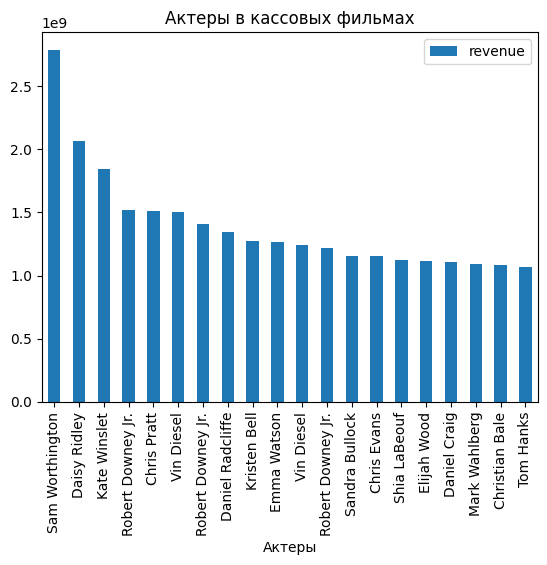

                                                           title       revenue
actors                                                                        
Sam Worthington                                           Avatar  2.787965e+09
Daisy Ridley                        Star Wars: The Force Awakens  2.068224e+09
Kate Winslet                                             Titanic  1.845034e+09
Robert Downey Jr.                                   The Avengers  1.519558e+09
Chris Pratt                                       Jurassic World  1.513529e+09
Vin Diesel                                             Furious 7  1.506249e+09
Robert Downey Jr.                        Avengers: Age of Ultron  1.405404e+09
Daniel Radcliffe    Harry Potter and the Deathly Hallows: Part 2  1.342000e+09
Kristen Bell                                              Frozen  1.274219e+09
Emma Watson                                 Beauty and the Beast  1.262886e+09
Vin Diesel                               The Fate of

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan


df['id'] = df['id'].apply(convert_int)
df = df.drop(df[df['id'].isnull()].index)
df['id'] = df['id'].astype('int')
df_merge = df.merge(credits_df, on='id')
df_merge = df_merge.drop(['crew'], axis=1)

df_merge['revenue'] = df_merge['revenue'].replace(0, np.nan)


def get_actors(x):
    for i in x:
        if i:
            return i['name']
    return np.nan


df_merge['cast'] = df_merge['cast'].apply(ast.literal_eval)
df_merge['actors'] = df_merge['cast'].apply(get_actors)

res = df_merge[['title', 'actors', 'revenue']].sort_values('revenue', ascending=False).set_index('actors').head(20)
res.plot(kind='bar', xlabel='Актеры', title='Актеры в кассовых фильмах')
plt.show()

print(res)

Ответ: Гипотеза верна, все актеры известны


## Гипотеза 3. Известные актеры снимаются в самыx дорогих фильмах

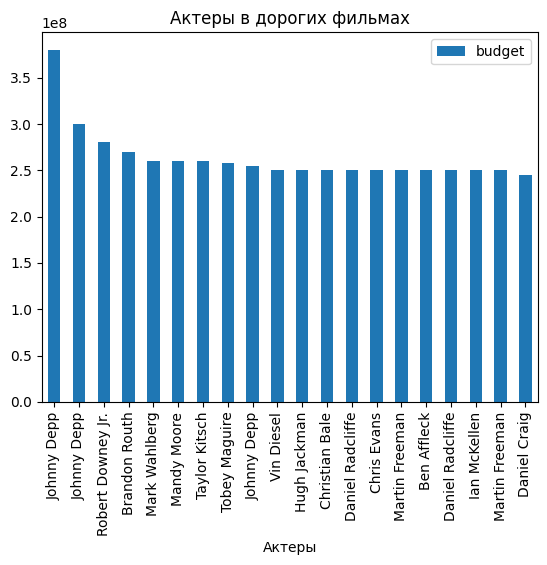

                                                          title       budget
actors                                                                      
Johnny Depp         Pirates of the Caribbean: On Stranger Tides  380000000.0
Johnny Depp            Pirates of the Caribbean: At World's End  300000000.0
Robert Downey Jr.                       Avengers: Age of Ultron  280000000.0
Brandon Routh                                  Superman Returns  270000000.0
Mark Wahlberg                     Transformers: The Last Knight  260000000.0
Mandy Moore                                             Tangled  260000000.0
Taylor Kitsch                                       John Carter  260000000.0
Tobey Maguire                                      Spider-Man 3  258000000.0
Johnny Depp                                     The Lone Ranger  255000000.0
Vin Diesel                              The Fate of the Furious  250000000.0
Hugh Jackman                         X-Men: Days of Future Past  250000000.0

In [ ]:
df_merge['budget'] = pd.to_numeric(df_merge['budget'], errors='coerce')
df_merge['budget'] = df_merge['budget'].replace(0, np.nan)

res = df_merge[['title', 'actors', 'budget']].sort_values('budget', ascending=False).set_index('actors').head(20)
res.plot(kind='bar', xlabel='Актеры', title='Актеры в дорогих фильмах')
plt.show()

print(res)

Ответ: Гипотеза верна, все актеры известны